In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded=files.upload()

In [ ]:
import matplotlib.pyplot as plt
df=pd.read_csv('bengaluru_house_prices.csv')
df.head(10)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,DuenaTa,1170,2.0,1.0,38.00
6,Super built-up Area,18-May,Old Airport Road,4 BHK,Jaades,2732,4.0,NaN,204.00
7,Super built-up Area,Ready To Move,Rajaji Nagar,4 BHK,Brway G,3300,4.0,NaN,600.00
8,Super built-up Area,Ready To Move,Marathahalli,3 BHK,NaN,1310,3.0,1.0,63.25
9,Plot Area,Ready To Move,Gandhi Bazar,6 Bedroom,NaN,1020,6.0,NaN,370.00


In [ ]:
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [ ]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df.shape

(13320, 9)

In [ ]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [ ]:
df['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [ ]:
df.columns=df.columns.str.strip()
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [ ]:
df=df.drop(['area_type','society','balcony','availability'],axis='columns')

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(12438, 5)

In [ ]:
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          72
price          0
dtype: int64

In [ ]:
df=df.dropna()
df.isnull().sum()
#df5.head(10)

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
df.shape

(12365, 5)

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(12365, 5)

In [ ]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
df['BHK'] =df['size'].apply(lambda x: int(x.split(' ')[0]))
df.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2
5,Whitefield,2 BHK,1170,2.0,38.00,2
6,Old Airport Road,4 BHK,2732,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300,4.0,600.00,4
8,Marathahalli,3 BHK,1310,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020,6.0,370.00,6


In [ ]:
df['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [ ]:
df[df.BHK>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [ ]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
def is_float(x):
   try:
     float(x)
   except:
     return False
   return True

In [ ]:
df[~df['total_sqft'].apply(is_float)].head(12)

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [ ]:
def convert_sqft_num(x):
   tokens = x.split('-')
   if len(tokens) == 2:
     return(float(tokens[0])+float(tokens[1]))/2
   try:
     return float(x)
   except:
     return None

In [ ]:
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_num)

In [ ]:
df.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [ ]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
BHK                   4
Name: 30, dtype: object

In [ ]:
df['Price_per_sqft'] = df['price']*100000/df['total_sqft']
df.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df1=df.copy()
df1['location'].unique

<bound method Series.unique of 0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316               Richards Town
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12365, dtype: object>

In [ ]:
df1.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df1.shape

(12365, 7)

In [ ]:
len(df1['location'])

12365

House price =df1

In [ ]:
df1['location']=df1['location'].apply(lambda x:x.strip())
locations=df1.groupby('location')['location'].agg('count').sort_values(ascending=False)

In [ ]:
locations

location
Whitefield               502
Sarjapur  Road           357
Electronic City          275
Thanisandra              225
Kanakpura Road           217
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Kariyammana Agrahara       1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [ ]:
locations[locations<=10]

location
BTM 1st Stage            10
Sadashiva Nagar          10
Dodsworth Layout         10
Marsur                   10
Dairy Circle             10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kariyammana Agrahara      1
whitefiled                1
Name: location, Length: 1062, dtype: int64

In [ ]:
len(locations[locations<=10])

1062

In [ ]:
locations_less_than_10=locations[locations<=10]
locations_less_than_10

location
BTM 1st Stage            10
Sadashiva Nagar          10
Dodsworth Layout         10
Marsur                   10
Dairy Circle             10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Kariyammana Agrahara      1
whitefiled                1
Name: location, Length: 1062, dtype: int64

In [ ]:
df1['location']=df1.location.apply(lambda x:'other' if x in locations_less_than_10 else x)

In [ ]:
df1['location']

0        Electronic City Phase II
1                Chikka Tirupathi
2                     Uttarahalli
3              Lingadheeranahalli
4                        Kothanur
                   ...           
13314           Green Glen Layout
13315                  Whitefield
13316                       other
13317       Raja Rajeshwari Nagar
13318             Padmanabhanagar
Name: location, Length: 12365, dtype: object

In [ ]:
df1.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


In [ ]:
df1[df1['total_sqft']/df1['BHK']<300].head()

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [ ]:
df1.shape

(12365, 7)

In [ ]:
df1=df1[~(df1['total_sqft']/df1['BHK']<300)]

In [ ]:
df1.shape

(11636, 7)

In [ ]:
df1.Price_per_sqft.describe()

count     11590.000000
mean       6402.285227
std        4273.223109
min         267.829813
25%        4255.319149
50%        5347.150569
75%        7000.000000
max      176470.588235
Name: Price_per_sqft, dtype: float64

In [ ]:
def remove_pps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('location'):
    m = np.mean(subdf.Price_per_sqft)
    st = np.std(subdf.Price_per_sqft)
    reduced_df = subdf[(subdf.Price_per_sqft>(m-st)) & (subdf.Price_per_sqft<=(m+st))]
    df_out = pd.concat([df_out, reduced_df],ignore_index=True)
  return df_out

df2= remove_pps_outliers(df1)

In [ ]:
df2.shape

(9544, 7)

In [ ]:
import seaborn as sns
def plot_scatter_chart(df,location):
  bhk2 = df[(df.location == location) & (df.BHK==2)]
  bhk3 = df[(df.location == location) & (df.BHK==3)]
  matplotlib.rcParams['figure.figsize'] = (15,10)
  plt.scatter(bhk2.total_sqft, bhk2.price, color='blue', label='2 BHK',s =50)
  plt.scatter(bhk3.total_sqft, bhk3.price, color='red', marker='+',label='3 BHK', s=50)
  plt.xlabel("Total Square Feet Area")
  plt.ylabel("Total Price")
  plt.title("Location")
  plt.legend()

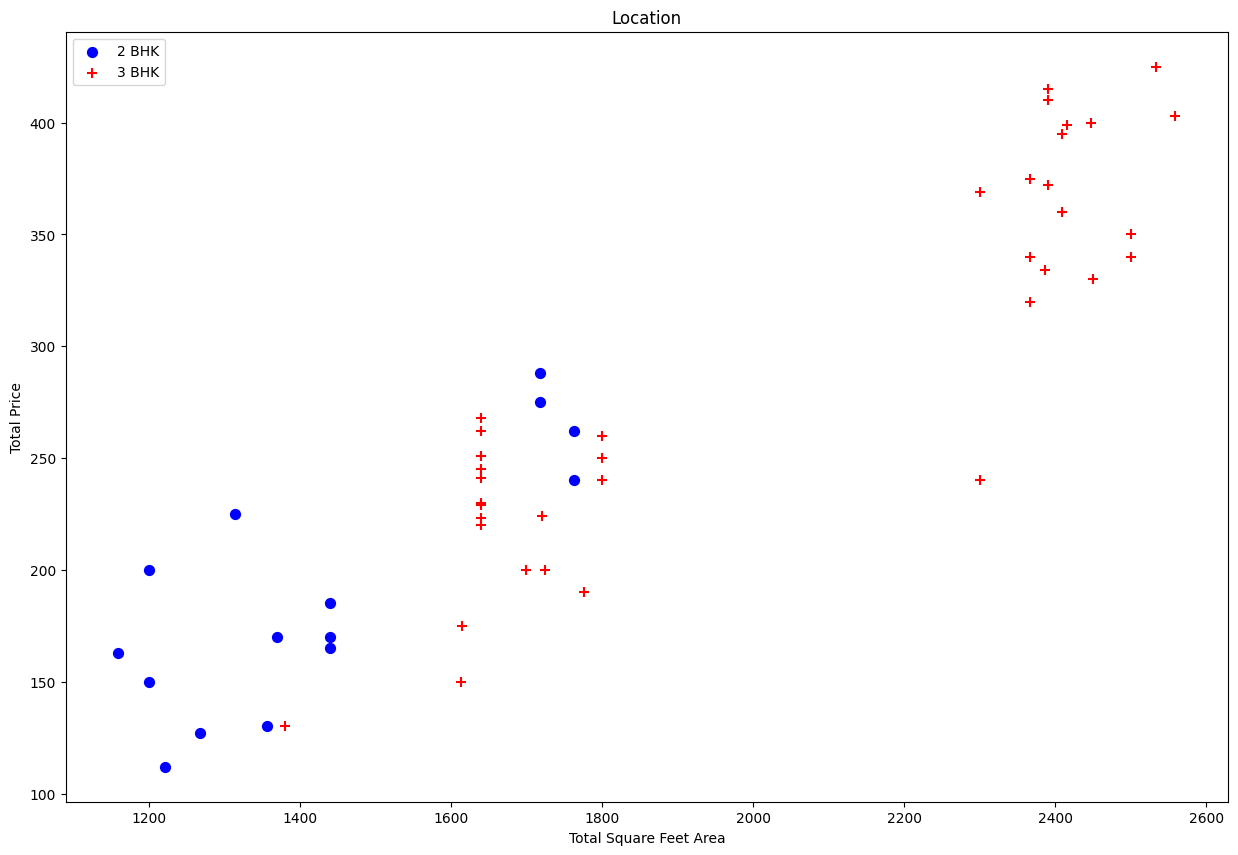

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plot_scatter_chart(df2,"Rajaji Nagar")

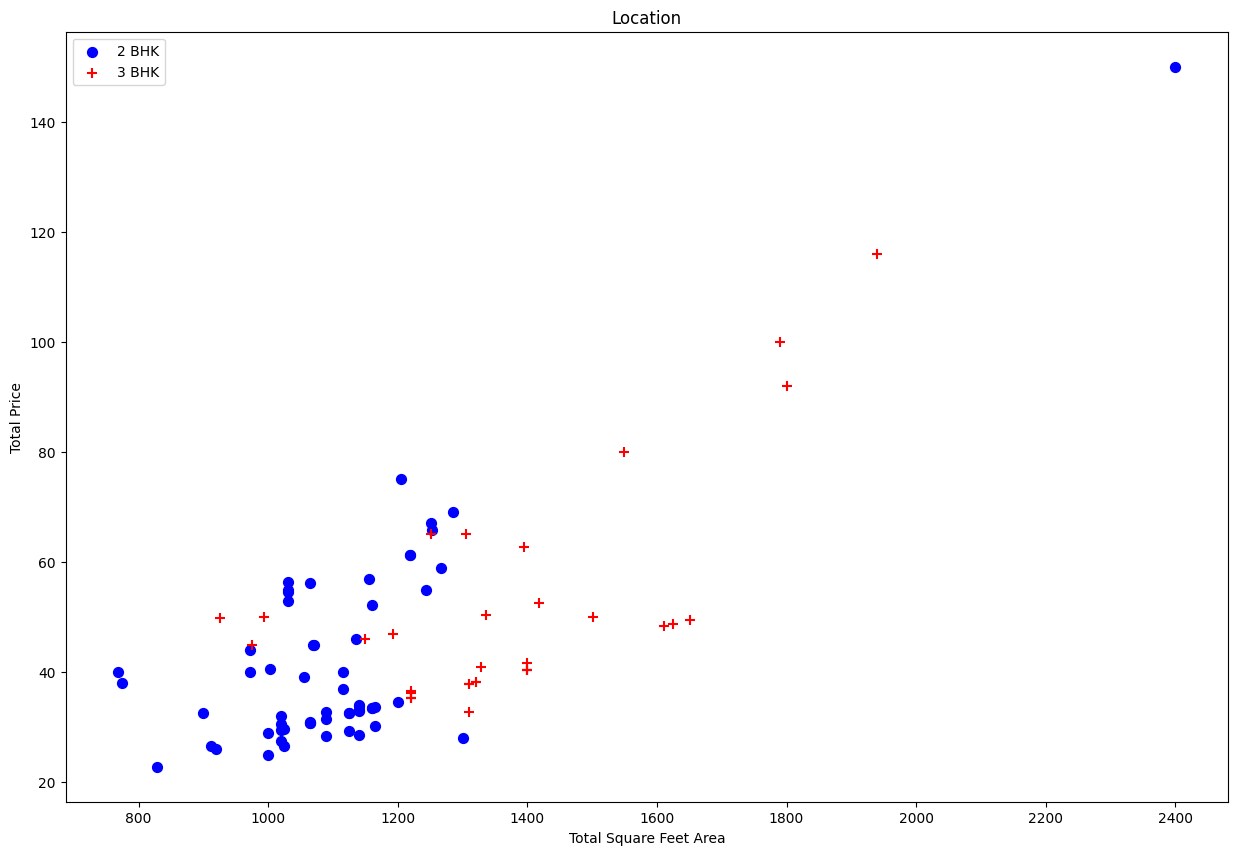

In [ ]:
plot_scatter_chart(df2,"Electronic City Phase II")

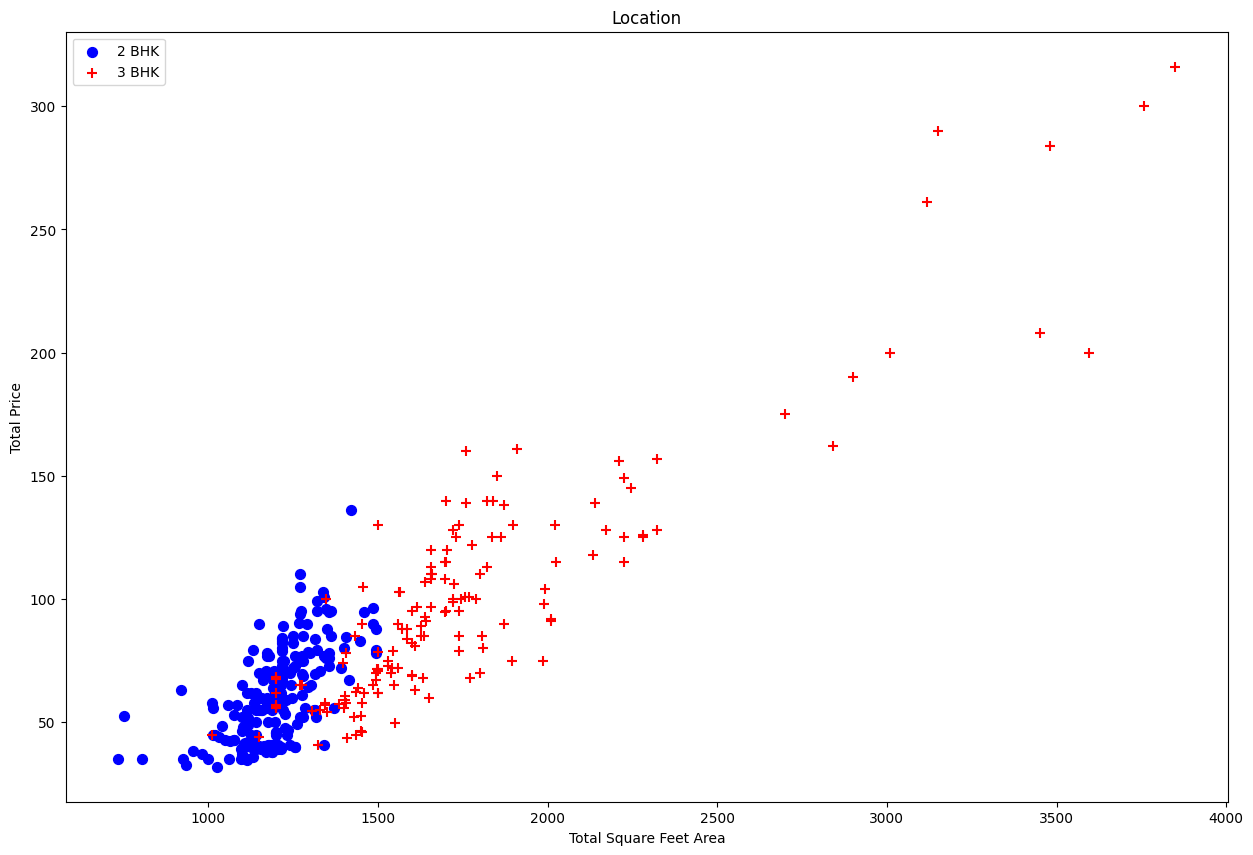

In [ ]:
plot_scatter_chart(df2,"Whitefield")

In [ ]:
def remove_bhk_outliers(df):
  exclude_indices = np.array([])
  for location, location_df in df.groupby('location'):
    bhk_stats = {}
    for bhk, bhk_df in location_df.groupby('BHK'):
      bhk_stats[bhk] = {
          'mean': np.mean(bhk_df.Price_per_sqft),
          'std':np.std(bhk_df.Price_per_sqft),
          'count':bhk_df.shape[0]
      }
      for bhk, bhk_df in location_df.groupby('BHK'):
        stats = bhk_stats.get(bhk-1)
        if stats and stats['count']>5:
          exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.Price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [ ]:
df2.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [ ]:
df2['bath'].unique

<bound method Series.unique of 0       4.0
1       3.0
2       2.0
3       2.0
4       2.0
       ... 
9539    1.0
9540    2.0
9541    2.0
9542    2.0
9543    5.0
Name: bath, Length: 9544, dtype: float64>

In [ ]:
df2[df2['bath']>10]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
4787,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
7778,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7871,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8612,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8949,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

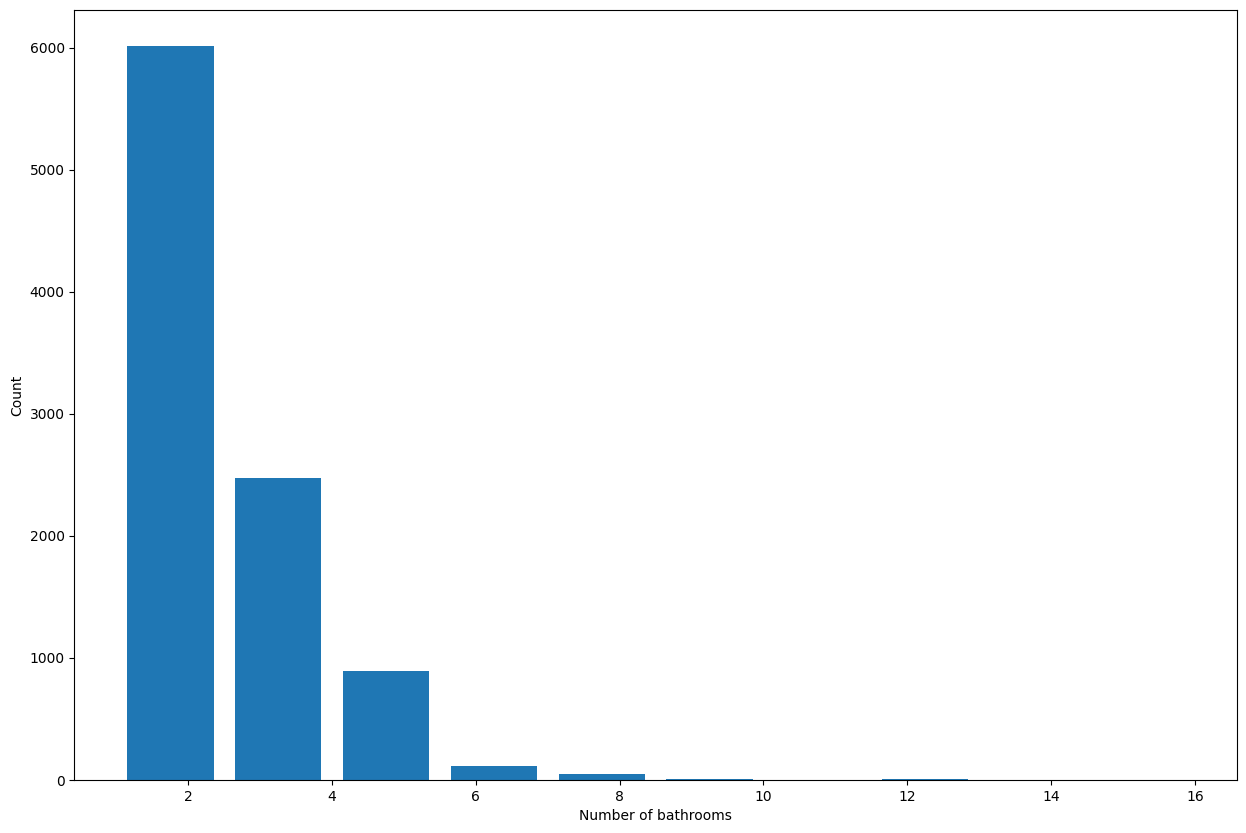

In [ ]:
plt.hist(df2.bath, rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [ ]:
df2[df2.bath>10]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
4787,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
7778,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
7871,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
8612,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
8949,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


In [ ]:
df2[df2.bath>df2.BHK+2]

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
1468,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
4756,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6091,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
7700,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [ ]:
df3=df2[df2.bath<df2.BHK+2]

In [ ]:
df3.head(10)

,location,size,total_sqft,bath,price,BHK,Price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,11983.805668
5,1st Block Jayanagar,4 BHK,2750.0,4.0,413.0,4,15018.181818
6,1st Block Jayanagar,4 BHK,2450.0,4.0,368.0,4,15020.408163
7,1st Phase JP Nagar,4 BHK,2825.0,4.0,250.0,4,8849.557522
8,1st Phase JP Nagar,3 BHK,1875.0,3.0,167.0,3,8906.666667
9,1st Phase JP Nagar,5 Bedroom,1500.0,5.0,85.0,5,5666.666667


In [ ]:
df3=df3.drop(['size','Price_per_sqft'],axis='columns')
df3.head(10)

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2
5,1st Block Jayanagar,2750.0,4.0,413.0,4
6,1st Block Jayanagar,2450.0,4.0,368.0,4
7,1st Phase JP Nagar,2825.0,4.0,250.0,4
8,1st Phase JP Nagar,1875.0,3.0,167.0,3
9,1st Phase JP Nagar,1500.0,5.0,85.0,5


In [ ]:
dummies = pd.get_dummies(df3.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,AECS Layout,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df3=pd.concat([df3,dummies.drop('other',axis='columns')],axis='columns')

In [ ]:
df3.head(10)

,location,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1st Block Jayanagar,2750.0,4.0,413.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1st Block Jayanagar,2450.0,4.0,368.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,1st Phase JP Nagar,2825.0,4.0,250.0,4,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1st Phase JP Nagar,1875.0,3.0,167.0,3,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1st Phase JP Nagar,1500.0,5.0,85.0,5,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df=df3.drop('location',axis='columns')
df.head(10)

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2750.0,4.0,413.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2450.0,4.0,368.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2825.0,4.0,250.0,4,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1875.0,3.0,167.0,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1500.0,5.0,85.0,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.shape

(9445, 235)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x=df.drop(['price'],axis='columns')
#y=df5['price']
x

,total_sqft,bath,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9539,1800.0,1.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9540,1095.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9541,1440.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9542,1075.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df['price']
y

0       428.00
1       194.00
2       235.00
3       130.00
4       148.00
         ...  
9539    200.00
9540     57.00
9541     63.93
9542     48.00
9543    400.00
Name: price, Length: 9445, dtype: float64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
len(x_train)

7556

In [ ]:
len(y_test)

1889

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
model.score(x_test,y_test)

0.8143895893203903

In [ ]:
import pickle

In [ ]:
with open('lr.pkl','wb')as model_file:
  pickle.dump(model,model_file)